In [2]:
import pandas as pd
# import geopandas as gp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
from pylab import *
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.patches as mpatches
from matplotlib import pylab
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm
# from cmcrameri import cm
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
import shapefile as shpfile
import xlrd
import geopandas as gpd
import os
from matplotlib.legend import Legend
import scipy.stats as stats
import matplotlib.lines as mlines
from scipy.stats import gaussian_kde
# import seaborn as sns

In [3]:
version='v16_250104'
output_dir = os.path.join(r'J:\lakemapping\postprocess',version)
auxiliary_dataset_gdb=r'J:\lakemapping\auxiliary_dataset.gdb'
eight_continents=['Asia','Siberia','Africa','Europe','Oceania_Anta','North_America','Arctic','South_America']
fig_path=r'D:\lakemapping\10_paper_writting\figure\v3_250114'

In [4]:
sample_dir=r'D:\lakemapping\2_dataset\sampleAnnotations\SampleV8'
region_file=os.path.join(sample_dir,'total_regions.shp')
label_file=os.path.join(sample_dir,'total_polygons.shp')

In [5]:
color_list=['#B8DBB3','#72B063','#E29135','#94C6CD','#719AAC','#4A5F7E']#浅绿，深绿，橙色，浅蓝，中蓝，深蓝
label_list=['0.005~0.01 ${km^2}$','0.01~0.03 ${km^2}$','0.03~0.1 ${km^2}$','0.1~1 ${km^2}$','>1 ${km^2}$']
sub_fig_name=['a','b','c','d','e']

In [6]:
global_diss=r'D:\lakemapping\0_auxiliary_data\World_Continents\world_vector\World_continents_dissolve.shp'

In [7]:
sample_region=gpd.read_file(region_file)
sample_label=gpd.read_file(label_file)

In [9]:
train_s=sample_region[sample_region['dataset']=='train']
val_s=sample_region[sample_region['dataset']=='val']
test_s=sample_region[sample_region['dataset']=='test']

# train_p=sample_label[sample_label['dataset']=='train']
# val_p=sample_label[sample_label['dataset']=='val']
# test_p=sample_label[sample_label['dataset']=='test']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_47108\1812306027.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sample_region['centroid'] = sample_region.geometry.centroid


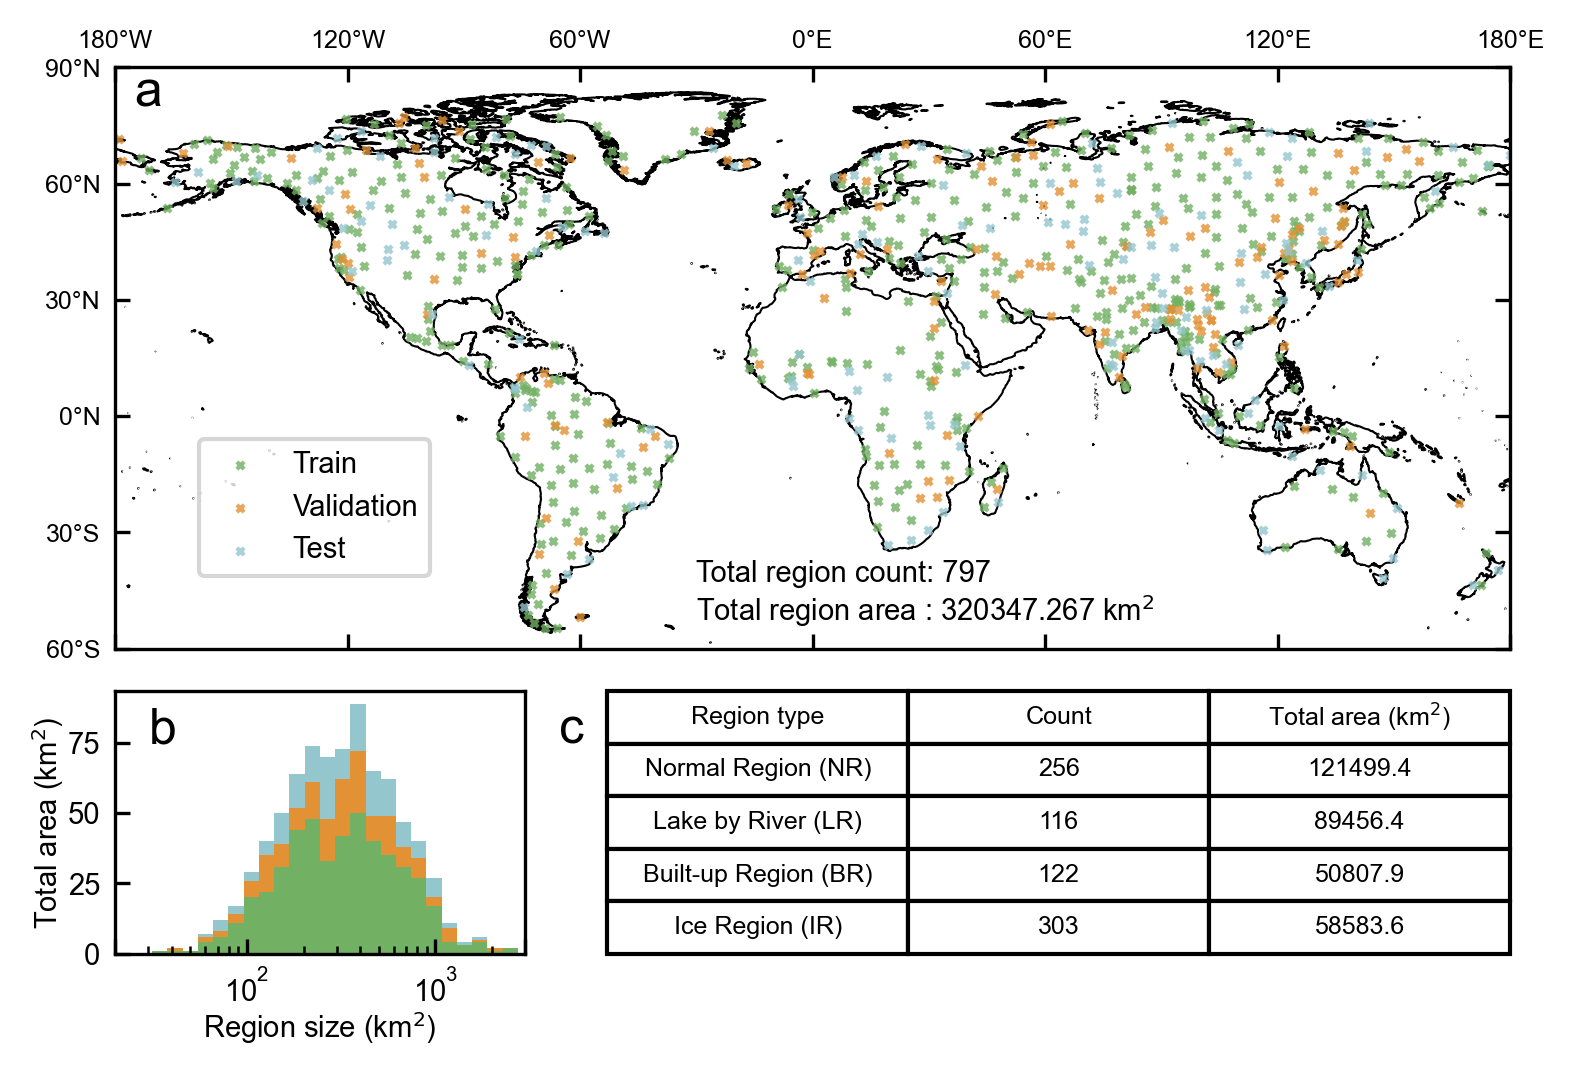

In [10]:
savepic=fig_path+'/2-2 region distribution.png'
fig=plt.figure(figsize=(6,4),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,3,width_ratios=[1,1,1],height_ratios=[2.5,1],wspace =0.2,hspace =0.01)
ax1=plt.subplot(gs[0, :])
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax1)
map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.5,zorder=1)

# map1.drawmeridians(np.arange(0, 360, 60),labels=[0,0,0,1],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线
# map1.drawparallels(np.arange(-30, 90, 30),labels=[0,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线

sample_region['centroid'] = sample_region.geometry.centroid
size_column = 'area'
label_column = 'dataset' 

# 提取中心点坐标
x = sample_region['centroid'].x
y = sample_region['centroid'].y

color_mapping = {
    'train':color_list[1],# 'DimGrey',
    'val':color_list[2],#'Grey',
    'test': color_list[3],#'LightGray'
}
ax1.set_xticks(np.arange(-180, 181, 60))
ax1.set_yticks(np.arange(-60, 91, 30))
ax1.set_xticklabels([f'{abs(x)}°W' if x < 0 else f'{abs(x)}°E' for x in np.arange(-180, 181, 60)],fontsize=6) 
ax1.set_yticklabels([f'{abs(y)}°S' if y < 0 else f'{abs(y)}°N' for y in np.arange(-60, 91, 30)],fontsize=6)
ax1.xaxis.set_tick_params(labeltop=True, labelbottom=False)
plt.tick_params(bottom=True, top=True, left=True, right=True )
# pie_size=[]
# 遍历类别进行绘制
for category, color in color_mapping.items():
    subset = sample_region[sample_region['dataset'] == category]
    if category=='train':
        label='Train'
    elif category=='val':
        label='Validation'
    else:
        label='Test'
    ax1.scatter(
        subset['centroid'].x,
        subset['centroid'].y,
        c=color,
        label=label,  # 为图例添加标签
        s=3,#subset['value'],  # 点大小
        marker='x',
#         edgecolor=color,  # 边框颜色
        linewidth=1,
        alpha=0.8
    )
#     pie_size.append(subset['area'].sum())#len(subset)

# 添加图例
ax1.legend(title=None, loc="lower left",bbox_to_anchor=(0.05, 0.1))
total_area=sample_region['area'].sum()
ax1.text(-175,80,sub_fig_name[0],fontsize=12)
ax1.text(-30,-55,f'Total region count: {len(sample_region)}\nTotal region area : {total_area:.3f} km$^2$', ha='left', va='bottom',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# ax_pie=ax1.inset_axes((0, 0.1,0.2,0.4)) 
# ax_pie.pie(pie_size, labels=color_mapping.keys(), colors=color_mapping.values(), autopct='%1.1f%%', startangle=140)
# ax_pie.set_xlabel('Total region area')

ax2 = plt.subplot(gs[1, 0])
ax2.text(30,75,sub_fig_name[1],fontsize=12)
bins=np.logspace(np.log10(sample_region['area'].min()), np.log10(sample_region['area'].max()), 27)
ax2.hist([train_s['area'],val_s['area'],test_s['area']],bins=bins,stacked=True,color=color_list[1:4])
ax2.set_xscale('log')  # 设置x轴为对数尺度
ax2.set_xlim(20,3000)
ax2.set_xticks([20,100,1000,3000])
ax2.set_xlabel('Region size (km$^2$)', labelpad=0.5)#, backgroundcolor='white'
# ax2.yaxis.label.set_backgroundcolor('white')
ax2.set_ylabel('Total area (km$^2$)', labelpad=0.5)
ax2.text(4500,75,sub_fig_name[2],fontsize=12)

ax3=plt.subplot(gs[1, 1:])
table_data=pd.read_excel(r'D:\lakemapping\10_paper_writting\figure\train_data_distribution.xlsx')
table=ax3.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center', bbox=[0.0, 0, 1.0, 1])
table[(0, 2)].set_text_props(text='Total area (km$^2$)')
ax3.set_axis_off()

plt.savefig(savepic,dpi=300,bbox_inches='tight')#,dpi=400
plt.show()

In [12]:
label=r'D:\lakemapping\10_paper_writting\figure\test_dataset_evalution\label_with_TP.shp'
label=gpd.read_file(label)
label

,Join_Count,TARGET_FID,L_area,TP_area,type,recall,omission,geometry
0,1,0,0.000952,0.000952,1,0.999994,6.090809e-06,"POLYGON Z ((96.09180 16.76059 0.00000, 96.0914..."
1,1,1,0.001333,0.001333,1,0.999998,1.663266e-06,"POLYGON Z ((96.08578 16.75879 0.00000, 96.0856..."
2,1,2,0.001619,0.001619,1,0.999999,6.578690e-07,"POLYGON Z ((96.09575 16.75735 0.00000, 96.0955..."
3,1,3,0.002095,0.002095,1,0.999999,9.355670e-07,"POLYGON Z ((96.02227 16.75699 0.00000, 96.0219..."
4,1,4,0.005904,0.005808,1,0.983871,1.612936e-02,"POLYGON Z ((95.94789 16.75681 0.00000, 95.9471..."
...,...,...,...,...,...,...,...,...
46128,1,46128,0.000000,0.000000,0,0.000000,1.000000e+00,"POLYGON Z ((30.35246 -2.30085 0.00000, 30.3521..."
46129,0,46129,0.000000,0.000000,0,0.000000,1.000000e+00,"POLYGON Z ((30.34832 -2.30103 0.00000, 30.3482..."
46130,0,46130,0.000000,0.000000,0,0.000000,1.000000e+00,"POLYGON Z ((30.34958 -2.30472 0.00000, 30.3494..."
46131,12,46131,0.000000,0.000000,0,0.000000,1.000000e+00,"POLYGON Z ((30.35282 -2.30813 0.00000, 30.3526..."


In [13]:
prediction=r'D:\lakemapping\10_paper_writting\figure\test_dataset_evalution\prediction_with_TP.shp'
prediction=gpd.read_file(prediction)
prediction

,Join_Count,TARGET_FID,P_area,FP_area,commission,River_mask,type,precision,TP_area,geometry
0,1,0,0.001176,0.000000e+00,0.000000,0,0,1.000000,0.001176,"POLYGON Z ((-49.90312 -9.37284 0.00000, -49.90..."
1,1,1,0.000098,1.601414e-09,0.000016,0,0,0.999984,0.000098,"POLYGON Z ((-49.90285 -9.37293 0.00000, -49.90..."
2,1,2,0.000294,0.000000e+00,0.000000,0,0,1.000000,0.000294,"POLYGON Z ((-49.90285 -9.37293 0.00000, -49.90..."
3,0,3,0.000588,5.882335e-04,1.000000,0,0,0.000000,0.000000,"POLYGON Z ((-49.92486 -9.37419 0.00000, -49.92..."
4,0,4,0.000196,1.960746e-04,1.000000,0,0,0.000000,0.000000,"POLYGON Z ((-49.85407 -9.38003 0.00000, -49.85..."
...,...,...,...,...,...,...,...,...,...,...
53336,1,53336,0.000774,1.935549e-04,0.250009,0,0,0.749991,0.000581,"POLYGON Z ((39.50476 13.19967 0.00000, 39.5047..."
53337,1,53337,0.002807,0.000000e+00,0.000000,0,0,1.000000,0.002807,"POLYGON Z ((39.58274 13.19437 0.00000, 39.5827..."
53338,0,53338,0.000097,9.677651e-05,1.000000,0,0,0.000000,0.000000,"POLYGON Z ((39.34702 13.19266 0.00000, 39.3469..."
53339,0,53339,0.000194,1.935538e-04,1.000000,0,0,0.000000,0.000000,"POLYGON Z ((39.34711 13.19167 0.00000, 39.3469..."


In [14]:
bins=[0,0.001,0.005,0.01,0.05,0.1,1,20]
# bins=np.logspace(-3, np.log10(label_with_omission['L_area'].max()), 27)
bin_labels=bins[1:]
label['bin']=pd.cut(label['L_area'],bins=bins, labels=bin_labels,right=False)
label_statistics=label.groupby('bin')['recall'].agg(['count', 'mean']).reset_index()
label_statistics

x=label['L_area']
y=label['TP_area']
x_and_y = np.vstack([x, y])
kde = gaussian_kde(x_and_y)
z = kde(x_and_y)
idx = z.argsort()
L_x, L_y, L_z = x[idx], y[idx], z[idx]

In [15]:
prediction['bin']=pd.cut(prediction['P_area'],bins=bins, labels=bin_labels,right=False)
prediction_statistics=prediction.groupby('bin')['precision'].agg(['count', 'mean']).reset_index()
prediction_statistics

x=prediction['P_area']
y=prediction['TP_area']
x_and_y = np.vstack([x, y])
kde = gaussian_kde(x_and_y)
z = kde(x_and_y)
idx = z.argsort()
P_x, P_y, P_z = x[idx], y[idx], z[idx]

In [16]:
area=label.groupby('bin')['L_area'].agg([ 'sum']).reset_index()
area

,bin,sum
0,0.001,6.660884
1,0.005,32.606474
2,0.010,34.776639
3,0.050,156.369077
4,0.100,120.302326
5,1.000,594.925980
6,20.000,528.615417


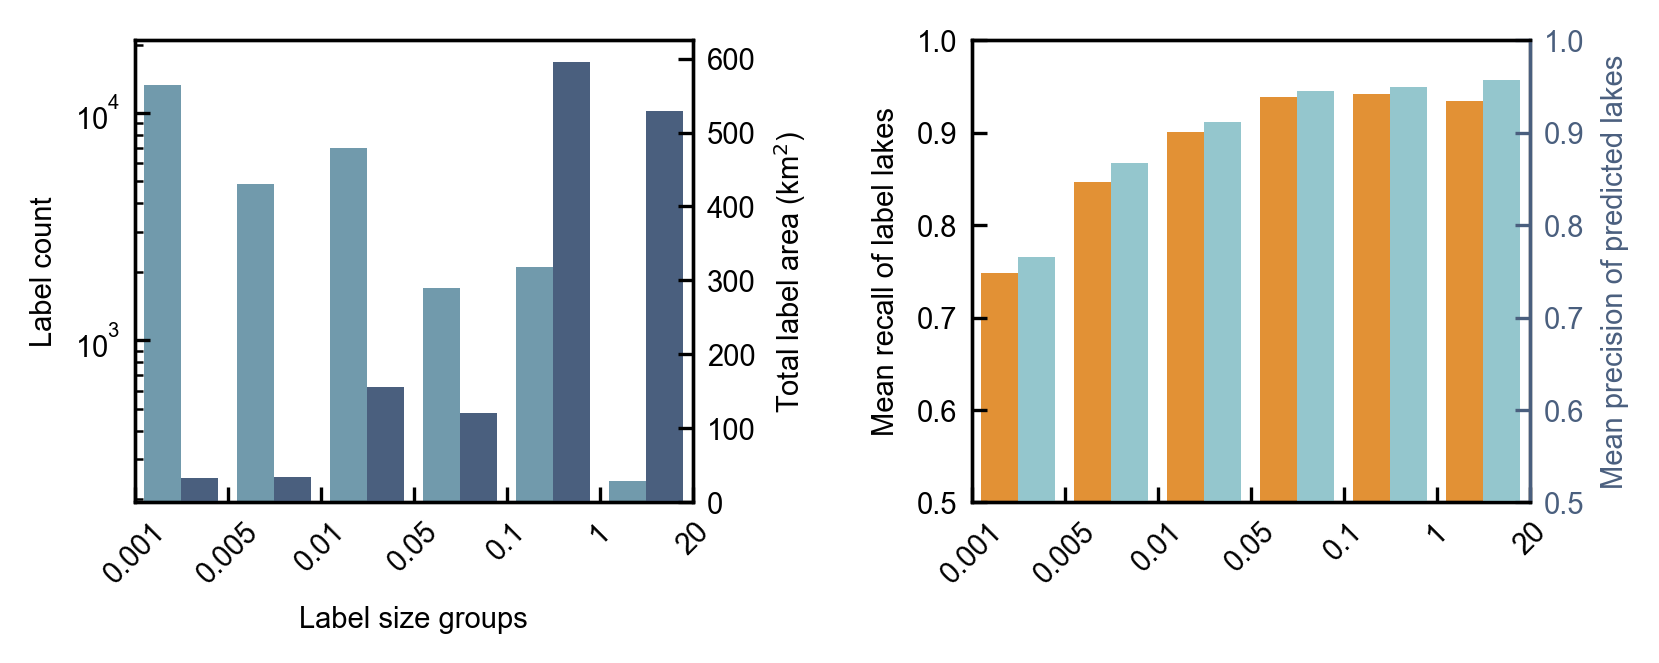

In [261]:
savepic=fig_path+'/2-2 lake-entity level mean recall and precision.png'
fig=plt.figure(figsize=(6,2),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,2,width_ratios=[1,1],wspace =0.5)
ax1=plt.subplot(gs[0,0])
ax1.bar(np.arange(-0.2,6,1), statistics['count'],width=0.4, color=color_list[4], label='Series1')
ax1.set_xlabel('Label size groups')
ax1.set_ylabel('Label count', color='k')
ax1.set_yscale('log')
ax1.set_xticks(np.arange(-0.5,7,1))
ax1.set_xlim(0.5,6.5)
ax1.set_xticklabels(bins,rotation=45)

ax11 = ax1.twinx()
ax11.bar(np.arange(0.2,7,1),area['sum'],width=0.4, color=color_list[5], label='Series1')
# 绘制第二个柱状图（右侧 y 轴）
ax11.set_ylabel('Total label area (km$^2$)')
# ax11.tick_params(axis='y', labelcolor=color_list[5])

# ax1.set_xscale('log')
ax2 = plt.subplot(gs[0,1])
ax2.bar(np.arange(-0.2,6,1), label_statistics['mean'], color=color_list[2],width=0.4, label='Series2')
ax2.set_ylabel('Mean recall of label lakes')
ax2.set_xticks(np.arange(-0.5,7,1))
ax2.set_xlim(0.5,6.5)
ax2.set_ylim(0.5,1)
ax2.set_xticklabels(bins,rotation=45)

ax22 = ax2.twinx()
ax22.set_ylim(0.5,1)
ax22.bar(np.arange(0.2,7,1),prediction_statistics['mean'],width=0.4, color=color_list[3], label='Series1')
# 绘制第二个柱状图（右侧 y 轴）
ax22.set_ylabel('Mean precision of predicted lakes', color = color_list[5])
ax22.spines['right'].set_color(color_list[5])
ax22.tick_params(axis = 'y', colors = color_list[5])
# ax11.tick_params(axis='y', labelcolor=color_list[5])
# ax2.set_xscale('log')
# ax3 = plt.subplot(gs[0,2])
# ax3.bar(np.arange(0.2,7,1), statistics['mean'], color=color_list[5], width=0.4, label='Series2', align='edge')
# ax3.set_ylabel('mean Recall', color='k')
plt.show()

In [17]:
def calculate(y_obs, y_pred):
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_obs, y_pred)
    r_squared = r_value ** 2  # R²

    # 2. 计算 MBE（Mean Bias Error）
    mbe = np.mean(y_pred - y_obs)

    # 3. 计算 PBIAS（Percent Bias）
    pbias = (np.sum(y_pred - y_obs) / np.sum(y_obs)) * 100
    
    return slope,r_squared,mbe,pbias

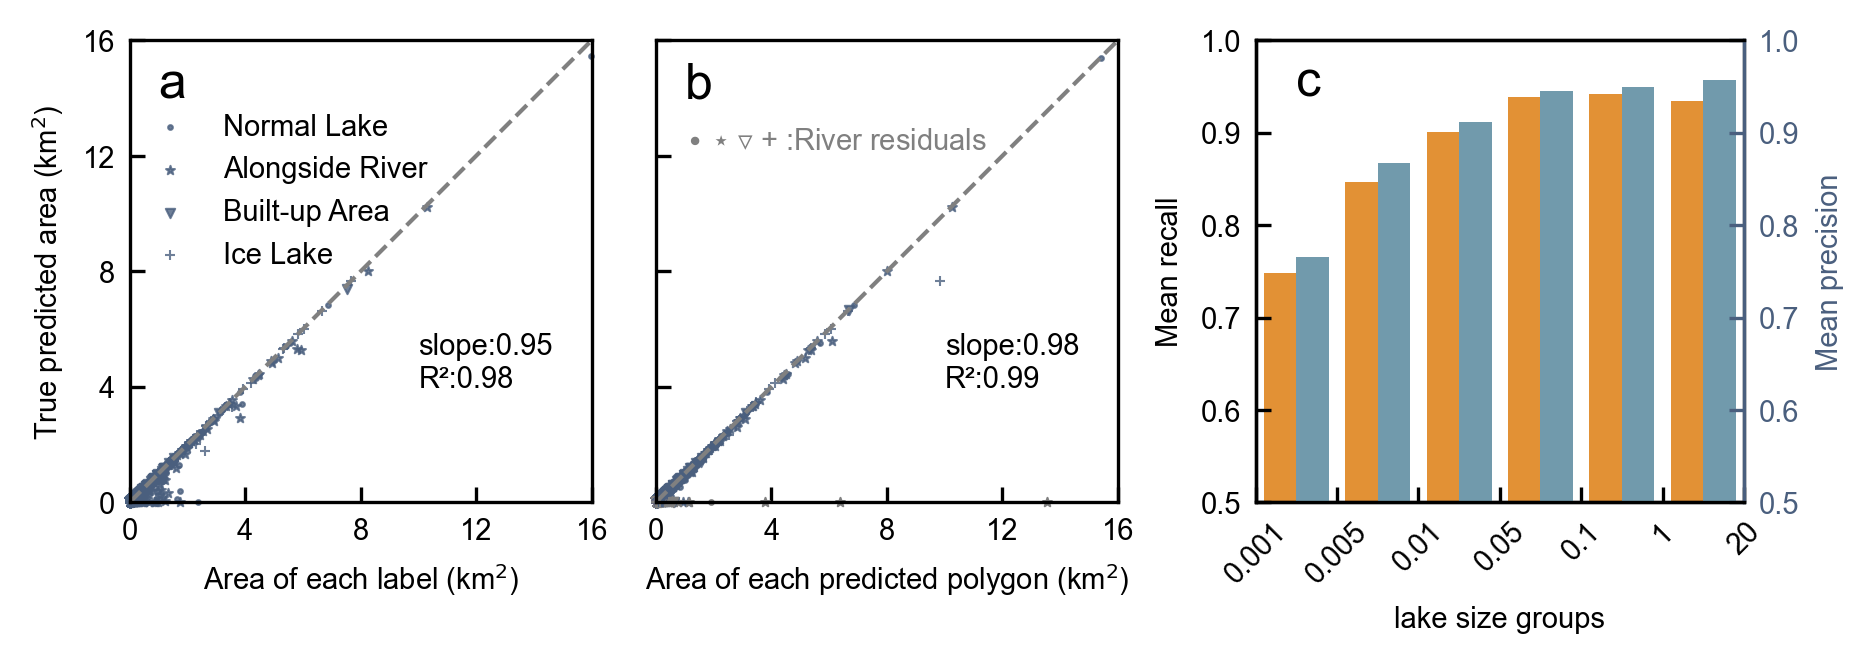

In [23]:
excel_file=r'D:\lakemapping\4_prediction\model0130\sampleV8\iew100_prediction_label_evaluation_2.xls'
# shapes =['o','v','x','+']
shapes =['.','*','v','+']
clist=color_list[1:]
labels=['Normal Lake','Alongside River','Built-up Area','Ice Lake']
maxlim=16
my_cmap = "Spectral_r"

savepic=fig_path+'/2-2 lake-entity level mean recall and precision.png'
fig=plt.figure(figsize=(7,2),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,4,width_ratios=[1,1,0.1,1],wspace =0.1)
ax1=plt.subplot(gs[0,0])
ax1.text(1,14,sub_fig_name[0],fontsize=12)
x_vals = np.linspace((0, maxlim+1), 1)  # 生成对角线的 x 值
y_vals = x_vals  # 对角线 y = x
ax1.plot(x_vals, y_vals, color='grey', linestyle='--',linewidth=1)

for t in range(0,4):
    # 选择当前类型的数据
    label_subset = label[label['type'] == t]
    ax1.scatter(label_subset['L_area'], label_subset['TP_area'],s=5,c=color_list[5],alpha=0.8,marker=shapes[t], label=labels[t],clip_on=False,linewidth=0.5)
# ax1.scatter(L_x, L_y, c=L_z,s=1, cmap=my_cmap) 
slope,r_squared,mbe,pbias=calculate(label['L_area'], label['TP_area'])
ax1.text(10,4,f'slope:{slope:.2f}\nR\u00b2:{r_squared:.2f}')# \nMBE:{mbe:.2f}\nPBIAS:{pbias:.2f}

ax1.set_xlabel('Area of each label (km$^2$)')
ax1.set_ylabel('True predicted area (km$^2$)')
ax1.set_aspect('equal')  # 设置长宽比 1:1
ax1.set_xlim(0,maxlim)
ax1.set_ylim(0,maxlim)
ax1.set_xticks(range(0,maxlim+1,4))
ax1.set_yticks(np.arange(0,maxlim+1,4))
ax1.set_axisbelow(True)
ax1.axvline(0.005, color='blue', linewidth=0.6, linestyle='--')
ax1.legend(loc=[0,0.48],frameon=False)

ax2=plt.subplot(gs[0, 1])
ax2.text(1,14,sub_fig_name[1],fontsize=12)
ax2.plot(x_vals, y_vals, color='grey', linestyle='--',linewidth=1)
# ax2.axhline(0.005, color='black', linewidth=1)

for t in range(0,4):
    # 选择当前类型的数据
    subset = prediction[(prediction['type'] == t) & (prediction['River_mask']==0)]
    river_residual=prediction[(prediction['type'] == t) & (prediction['River_mask']==1)]
    ax2.scatter(subset['P_area'], subset['TP_area'],s=5,c=color_list[5],marker=shapes[t],alpha=0.8,label=labels[t],clip_on=False,linewidth=0.5)
    ax2.scatter(river_residual['P_area'], river_residual['TP_area'],s=5,c='grey',marker=shapes[t], label=labels[t],clip_on=False,linewidth=0.5)
   
data=prediction[prediction['River_mask']==0]
slope,r_squared,mbe,pbias=calculate(data['P_area'], data['TP_area'])
ax2.text(10,4,f'slope:{slope:.2f}\nR\u00b2:{r_squared:.2f}') #\nMBE:{mbe:.2f}\nPBIAS:{pbias:.2f}
ax2.set_xlim(0,maxlim)
ax2.set_ylim(0,maxlim)
ax2.set_xticks(range(0,maxlim+1,4))
ax2.set_yticks(np.arange(0,maxlim+1,4))
ax2.set_xlabel('Area of each predicted polygon (km$^2$)')
# ax2.set_ylabel('True prediction (km$^2$)')
ax2.set_aspect('equal')  # 设置长宽比 1:1
ax2.set_axisbelow(True)
plt.tick_params(labelbottom=True,labeltop=False,labelleft=False, labelright=False)
ax2.text(1, 12, r'$\bullet$ $\star$ $\triangledown$ + :River residuals', color='grey', ha='left', va='bottom')  # 空心圆圈
# plt.text(0, 0, r'$\circ$ Normal Lake $\triangledown$ Alongside River + Built-up Area $\times$ Ice Lake', fontsize=6, color='black', ha='left', va='bottom')  # 空心圆圈

ax3 = plt.subplot(gs[0,3])
ax3.text(1,0.94,sub_fig_name[2],fontsize=12)
ax3.bar(np.arange(-0.2,6,1), label_statistics['mean'], color=color_list[2],width=0.4, label='Series2')
ax3.set_ylabel('Mean recall')
ax3.set_xticks(np.arange(-0.5,7,1))
ax3.set_xlim(0.5,6.5)
ax3.set_ylim(0.5,1)
ax3.set_xticklabels(bins,rotation=45)
ax3.set_xlabel('lake size groups')

ax33 = ax3.twinx()
ax33.set_ylim(0.5,1)
ax33.bar(np.arange(0.2,7,1),prediction_statistics['mean'],width=0.4, color=color_list[4], label='Series1')
# 绘制第二个柱状图（右侧 y 轴）
ax33.set_ylabel('Mean precision', color = color_list[5])
ax33.spines['right'].set_color(color_list[5])
ax33.tick_params(axis = 'y', colors = color_list[5])
plt.savefig(savepic,dpi=300,bbox_inches='tight')#,dpi=400
plt.show()

In [302]:
river_residual

,Join_Count,TARGET_FID,P_area,FP_area,commission,River_mask,type,precision,TP_area,geometry,bin
11927,0,11927,0.000636,6.363959e-04,1.000000e+00,1,3,0.000000,0.000000,"POLYGON Z ((-148.90528 60.80247 0.00000, -148....",0.001
11928,0,11928,0.000441,4.405821e-04,1.000000e+00,1,3,0.000000,0.000000,"POLYGON Z ((-148.90501 60.80283 0.00000, -148....",0.001
11929,0,11929,0.000049,4.895389e-05,1.000000e+00,1,3,0.000000,0.000000,"POLYGON Z ((-148.90528 60.80247 0.00000, -148....",0.001
11932,1,11932,0.002839,1.958154e-04,6.896594e-02,1,3,0.931034,0.002643,"MULTIPOLYGON Z (((-148.90699 60.80283 0.00000,...",0.005
11959,0,11959,0.144323,1.443228e-01,1.000000e+00,1,3,0.000000,0.000000,"POLYGON Z ((-148.87510 60.79250 0.00000, -148....",1.000
17665,1,17665,0.049607,2.918663e-02,5.883523e-01,1,3,0.411648,0.020421,"POLYGON Z ((5.58923 61.83383 0.00000, 5.58923 ...",0.050
17666,0,17666,0.001185,1.184564e-03,1.000000e+00,1,3,0.000000,0.000000,"POLYGON Z ((5.57683 61.83131 0.00000, 5.57683 ...",0.005
17667,0,17667,0.001374,1.374103e-03,1.000000e+00,1,3,0.000000,0.000000,"POLYGON Z ((5.57584 61.83140 0.00000, 5.57584 ...",0.005
17672,0,17672,0.001658,1.658421e-03,1.000000e+00,1,3,0.000000,0.000000,"POLYGON Z ((5.57288 61.83068 0.00000, 5.57288 ...",0.005
17674,0,17674,0.001469,1.468901e-03,1.000000e+00,1,3,0.000000,0.000000,"POLYGON Z ((5.57135 61.83059 0.00000, 5.57135 ...",0.005
